# Task3: GridSearch

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

## Data import

In [2]:
digits = datasets.load_digits()


In [3]:
X = digits.data
y = digits.target

## Part 3

##  GridSearchCV  and Validation curve for Linear regression with L2 regularization (Ridge)

In [4]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
alpha = [1/x for x in C]

GridSearchCV implementation to find best alpha 



In [5]:
%%time
param_grid = { 'alpha' : alpha}
grid_search = GridSearchCV(Ridge(), param_grid, cv=10)
grid_search.fit(X, y)

CPU times: user 1.02 s, sys: 57.1 ms, total: 1.08 s
Wall time: 411 ms


In [6]:
model = grid_search.best_params_
print(model)
print(grid_search.best_score_)



{'alpha': 0.1}
0.534724723181


Validation Curve

In [7]:
train_scores, test_scores = validation_curve(
    Ridge(), X, y, "alpha", alpha, cv=10)

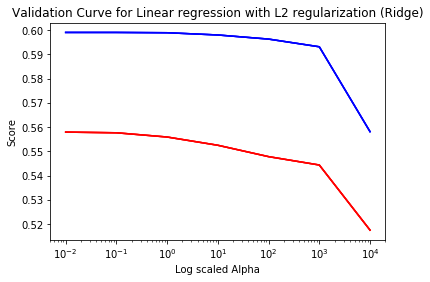

In [10]:
plt.plot(alpha, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(alpha, np.median(test_scores, 1), color='red', label='validation score')
plt.title("Validation Curve for Linear regression with L2 regularization (Ridge)")
plt.xscale('log')
plt.xlabel("Log scaled Alpha")
plt.ylabel("Score")
plt.show()

##  GridSearchCV  and Validation curve for Logistic regression with L2 regularization

In [0]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

GridSearchCV implementation to find best C

In [31]:
%%time
param_grid = { 'C' : C}
grid_search = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=10)
grid_search.fit(X, y)

CPU times: user 20 s, sys: 5.5 s, total: 25.5 s
Wall time: 17.8 s


In [32]:
model = grid_search.best_params_
print(model)
print(grid_search.best_score_)

{'C': 0.01}
0.9376739009460211


Validation Curve

In [0]:
train_scores, test_scores = validation_curve(
    LogisticRegression(penalty='l2'), X, y, "C", C, cv=10)

Text(0,0.5,'Score')

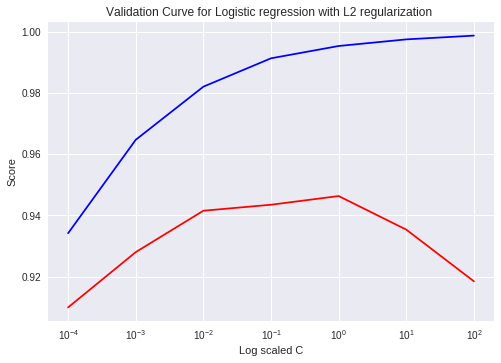

In [13]:
plt.plot(C, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(C, np.median(test_scores, 1), color='red', label='validation score')
plt.title("Validation Curve for Logistic regression with L2 regularization ")
plt.xscale('log')
plt.xlabel("Log scaled С")
plt.ylabel("Score")

As it could be seen from the graph the most appropriate value for the regularization 

##  GridSearchCV  and Validation curve for LinearSVС with L2 regularization

In [0]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


GridSearchCV implementation to find best C

In [41]:
%%time
param_grid = { 'C' : C}
grid_search = GridSearchCV(LinearSVC(penalty='l2'), param_grid, cv=10)
grid_search.fit(X, y)

CPU times: user 10.9 s, sys: 4.66 s, total: 15.6 s
Wall time: 9.02 s


In [42]:
model = grid_search.best_params_
print(model)
print(grid_search.best_score_)

{'C': 0.001}
0.9393433500278241


Validation Curve

In [0]:
train_scores, test_scores = validation_curve(
    LinearSVC(penalty='l2'), X, y, "C", C, cv=10)

Text(0,0.5,'Score')

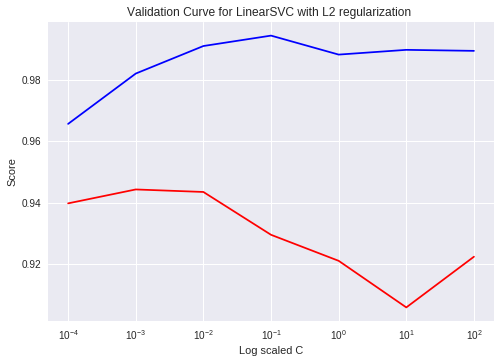

In [44]:
plt.plot(C, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(C, np.median(test_scores, 1), color='red', label='validation score')
plt.title("Validation Curve for LinearSVC with L2 regularization ")
plt.xscale('log')
plt.xlabel("Log scaled С")
plt.ylabel("Score")

## GridSearchCV for SVC with Polynomial kernel

In [0]:
degree = np.arange(0,10)

In [27]:
%%time
param_grid = { 'degree' : degree}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=10)
grid_search.fit(X, y)

CPU times: user 17.9 s, sys: 11.7 ms, total: 17.9 s
Wall time: 17.9 s


In [28]:
model = grid_search.best_params_
print(model)
print(grid_search.best_score_)

{'degree': 3}
0.9788536449638287


In [0]:
train_scores, test_scores = validation_curve(
    SVC(kernel='poly'), X, y, param_name="degree", param_range=degree,
    cv=10, scoring="accuracy", n_jobs=1)


Text(0,0.5,'Score')

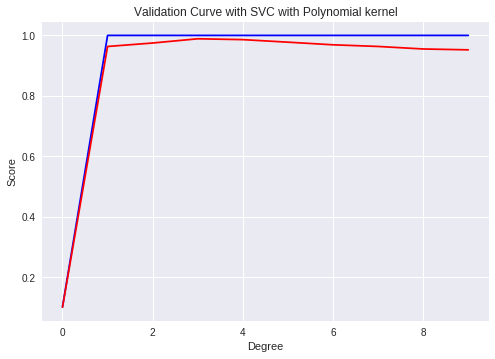

In [30]:
plt.plot(degree, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(degree, np.median(test_scores, 1), color='red', label='validation score')
plt.title("Validation Curve with SVC with Polynomial kernel")
plt.xlabel("Degree")
plt.ylabel("Score")

As it could be seen different parameters of a different models were compared on the MNIST dataset. The linear regression model showed poor performance not exceeding even 60%, while logistic regression and LinearSVC showed similar results just below 95% and the best accuracy score showed SVC with polynomial degree of 3 - 98%. Thus, Support Vector machine performs better then other machine learning algorithms. However, as it could be seen it takes 17.9 seconds to execute, while Linear SVC took just 9 second - two times faster. With not considerable accuracy difference performance time is in more priority. Thus, It in a production it is highly suggested to use LinearSVC with l2 regularization C value of 0.01.